In this chapter, we will first look at some advanced applications of simulation. We'll see how simulation is used in business planning. We'll then work through `Monte Carlo integration` and see how simulation is used for power analysis. Finally, we'll run a portfolio simulation as an introduction to financial applications. Let's first look at the business planning scenario.
## 1. Simulation for Business Planning
### 1.1. Theory
#### Simulation for business planning
As seen in the previous chapters 
>- [1. Introduction to randomness-simulations](https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/Statistics/Sampling%20%26%20Resampling/Resampling/introduction-randomness-simulations.ipynb), 
>- [2. Probability_generation_process](https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/Statistics/Sampling%20%26%20Resampling/Resampling/Probability%20%26%20data%20generation%20process.ipynb),
>- [3.Resampling_methods](https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/Statistics/Sampling%20%26%20Resampling/Resampling/Resampling_methods.ipynb), 

simulation is widely used in business for decision making. It's extremely useful in situations involving uncertainty. This makes it a wonderful tool for forecasting and planning.

Let's investigate this application in the context of a real business. Suppose you manage a small corn farm and are interested in planning your costs for the upcoming season.

#### Corn farm.
First, let's identify the sources of uncertainty in your business.
>- Your production of corn can be influenced by the amount of rainfall that season, your inputs into the farm like fertilizer, irrigation system, etc. 
>- The demand for corn could be influenced by numerous factors, for instance, how many people go to the movies and consume popcorn. All these factors will influence the price of corn, along with government regulation. 

To start understanding the profitability, we need to simplify this mental model and abstract away from the details. Let's build a very basic model of this business.

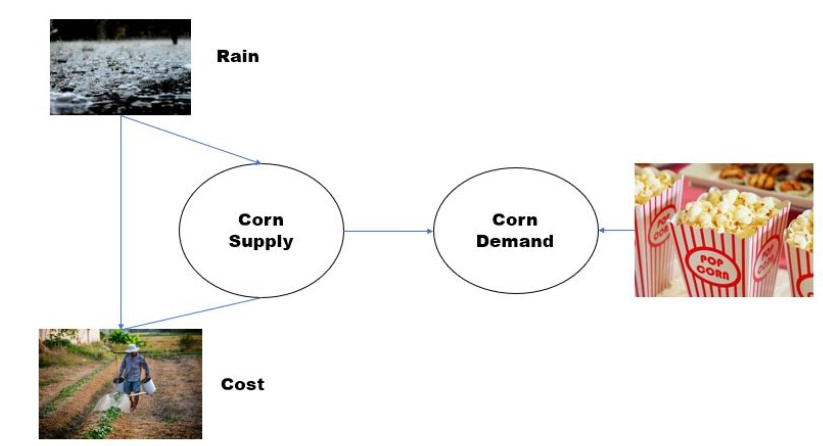

In [1]:
from IPython.display import Image
## Hình minh họa Image(fig1, height, width)

#### Business profitability
At a very basic level
>- Your `input` to the business is your cost. 
>- `Production` is determined by `cost` and `rain`, which is a random variable. 
>- `Demand` and `price` are externally determined. 

However, you might have historical distribution of demand and price. Your profitability then depends on how much of the corn you produced is actually sold.

Given this basic model, you can then vary the cost input and track the impact on profitability. For instance, 
>- you could plug in a range of values for cost and select the one that results in the highest average profits.
>- Once you have this basic model, you can begin tweaking it by adding more inputs or multiple sources of uncertainty.
>- For example, you might be able to get local weather patterns from your weather station and get a more accurate estimate of how corn production is affected by the weather conditions.

Thus, simulation gives you a very simple yet powerful framework for understanding the uncertainty inherent in business environments and for using this uncertainty to drive informed decisions.

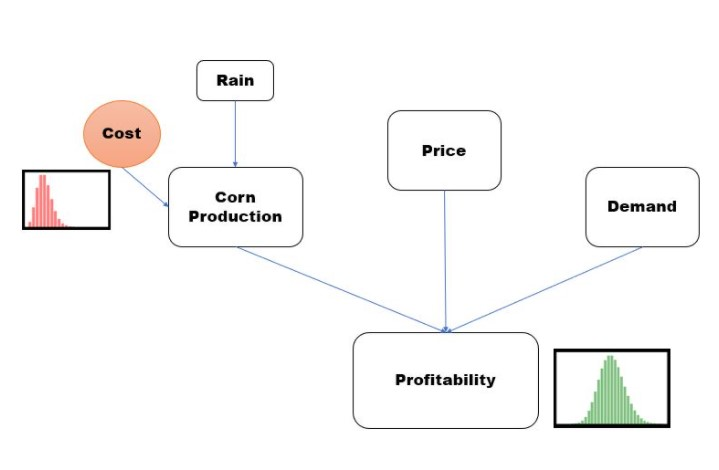

In [2]:
## Hình minh họa Image(fig1, height, width)

### 1.2. PRACTICES
#### Exercise 1.2.1. Modeling Corn Production
Suppose that you manage a small corn farm and are interested in optimizing your costs. In this illustrative exercise, we will model the production of corn. We'll abstract away from details like units and focus on the process.

For simplicity, let's assume that corn production depends on only two factors: 
>- `rain`, which you don't control, [`Rain` is `normally distributed` with `mean` $50$ and `standard deviation` $15$] 
>- and `cost`, which you control. For now, let's fix cost at `5,000`.

Let's assume that corn produced in any season is a Poisson random variable and that the average corn production is governed by the equation:

$$ 100 \times (\text{cost})^{0.1} \times (\text{rain})^{0.2} $$
Let's model this production function and simulate one outcome.
#### SOLUTION.

In [3]:
import numpy as np

# Initialize variables
cost = 5000
rain = np.random.normal(50, 15)

# Corn Production Model
def corn_produced(rain, cost):
    mean_corn = 100 * (rain**0.2) * (cost**0.1)
    corn = np.random.poisson(lam = mean_corn)
    return corn

# Simulate and print corn production
corn_result = corn_produced(rain, cost)
print("Simulated Corn Production = {}".format(corn_result))

Simulated Corn Production = 509


#### Exercise 1.2.2. Modeling Profits
In the previous exercise, you built a model of corn production. For a small farm, you typically have no control over the price or demand for corn. >- Suppose that price is `normally distributed` with `mean 40` and `standard deviation 10`. 
>- You will write a function `corn_demanded()`, which takes the price and determines the demand for corn. 

This is reasonable because demand is usually determined by the market and is not in your control.

In this exercise, you will work on a function to calculate the `profit` by pulling together all the other simulated variables. 
>- The only input to this function will be the fixed cost of production. 
>- Upon completion, you'll have a function that gives one simulated profit outcome for a given cost. 

This function can then be used for planning your costs.
#### SOLUTION.
**Step 1.** Write the function `corn_demanded()`

In [4]:
def corn_demanded(price):
    mean_corn = 200 * (price - price**(-0.2))
    corn = np.random.poisson(lam = abs(mean_corn))
    return corn

**Step 2.** Calculate profits.

In [5]:
# Function to calculate profits
def profits(cost):
    rain = np.random.normal(50, 15)
    price = np.random.normal(40, 10)
    supply = corn_produced(rain, cost)
    demand = corn_demanded(price)
    equil_short = supply <= demand
    if equil_short == True:
        tmp = supply*price - cost
        return tmp
    else:
        tmp2 = demand*price - cost
        return tmp2
result = profits(cost)
print("Simulated profit = {}".format(result))

Simulated profit = 22786.454933372246


#### Exercise 1.2.3. Optimizing Costs
Now we will use the functions you've built to optimize our cost of production. We are interested in maximizing average profits. 

However, our profits depend on a number of factors, while we only control cost. 

Thus, we can simulate the uncertainty in the other factors and vary cost to see how our profits are impacted.
>- Since you manage the small corn farm, you have the ability to choose your cost - from `$100` to `$5,000`. 
>- You want to choose the cost that gives you the maximum average profit. 

In this exercise, we will simulate multiple outcomes for each cost level and calculate an average. We will then choose the cost that gives us the maximum mean profit. Upon completion, you will have a framework for selecting optimal inputs for business decisions.
#### SOLUTION.

In [6]:
# Initialize empty-dictionary results; and cost_levels variables
sims, results = 19, {}
cost_levels = np.arange(100, 5100, 100)

# For each cost level, simulate profits and store mean profit
for cost in cost_levels:
    tmp_profits = 0
    for i in range(sims):
        tmp_profits += profits(cost)
    results[cost] = tmp_profits / sims
    
# Get the cost that maximizes average profit
# Find the cost level cost_max that has the maximum average profit by running results through the list comprehension.
cost_max = [x for x in results.keys() if results[x] == max(results.values())][0]
print("Average profit is maximized when cost = {}".format(cost_max))

Average profit is maximized when cost = 2500


## 2. Monte Carlo Integration
In this section, we will study how simulation can help in calculus via `Monte Carlo integration`. 
>- `Monte Carlo integration` is a `numerical integration technique` that utilizes the power of random numbers. 
>- For functions with just a single variable, Monte Carlo integration might seem inefficient.
>- However, it's the method of choice as the number of dimensions becomes large. 

It's a relatively simple and intuitive process, let's try to understand it with a simple example.
### 2.1. Theory.
#### Definite integration
Consider a simple curve: `x squared`. 
>- You are interested in finding the area under this curve between `x = 1` and `x = 2`. 
>- Solving by hand, 
$$ \displaystyle \int_1^2 x^2 dx = \left. \dfrac{x^3}{3} \right\vert_{x=1}^{x=2} = \dfrac{7}{3}. $$
you evaluate this as x cubed divided by three with limits `1` to `2`, giving us `7` divided by `3` or `2.333.` 

Now let's take a Monte Carlo integration approach to this same problem.

#### Monte Carlo integration
The Monte Carlo integration approach can be boiled down to a three step procedure. 
>- First calculate the overall area by looking at the limits of the function. For a simple function of one variable, this area will be in the form of a rectangle. 
>- Next, randomly sample points within this rectangle. Next count the fraction of points below the curve.
>- Finally, multiply this fraction by the overall area. 

Let's put this approach to work for our `x-squared function`. As we can see in the figure on the right, the total area of the rectangle is 4. Let's see how we can calculate this integral step-by-step.

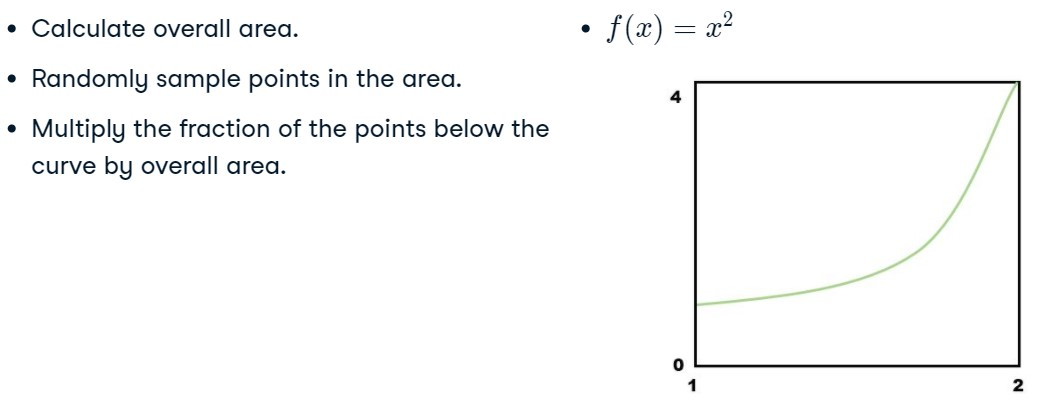

In [7]:
## Hình minh họa Image(fig1, height, width)

>- In the first step, we need to find the limits of the function. Looking at the integral, we see that `x` goes from `1` to `2`. Additionally the `y` limits go from `0` to `4` giving us an `overall area` of `4`.
>- Next we visualize this rectangle with the curve. Now we can start randomly sampling points in this rectangle. Since we sample randomly, the points can fall anywhere in this rectangle. We sample a large number of points.

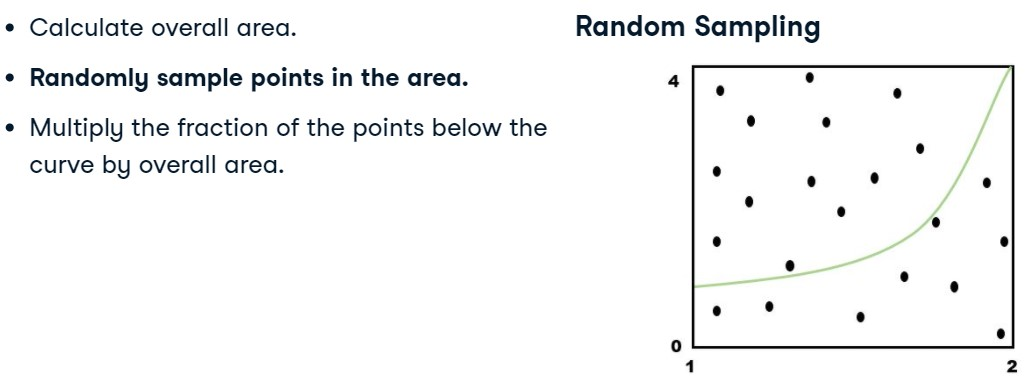

In [8]:
## Hình minh họa Image(fig1, height, width)

>- Finally, we count the fraction of points below the curve and multiply by overall area. If we sample say, 5,000 points, we get an answer of 2.303 which is pretty close to the actual answer of 2.333. Increasing the number of points we sample results in more accurate results. And it's that simple, this is the main idea behind `Monte Carlo integration`. Although this technique might seem overly complicated for evaluating simple integrals, it scales very well to multidimensional functions, which are very difficult to handle otherwise. This technique has applications in areas like particle physics and computational biology.

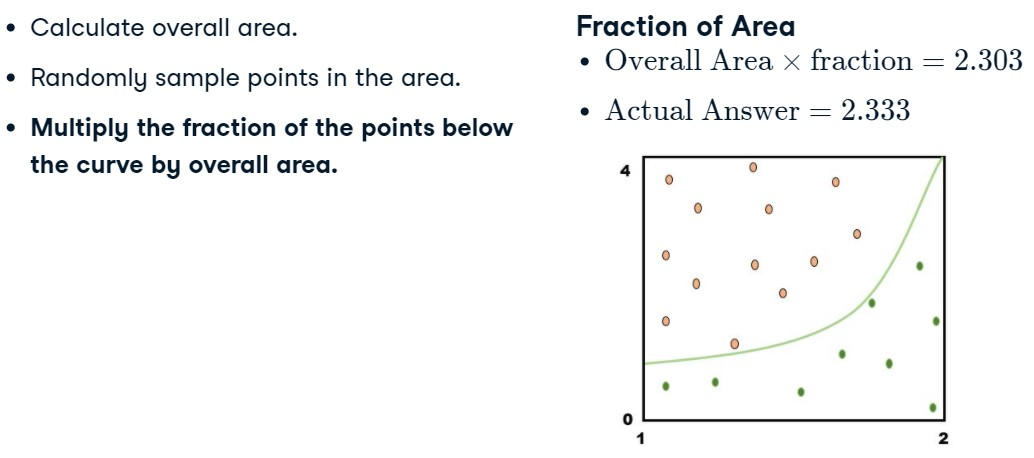

In [9]:
## Hình minh họa Image(fig1, height, width)

### 2.2. PRACTICES
#### Exercise 2.2.1. Integrating a Simple Function
This is a simple exercise introducing the concept of `Monte Carlo Integration`.

Here we will evaluate a simple integral $$\displaystyle \int_0^1 xe^x dx.$$ 
- We know that the exact answer is $1$, but simulation will give us an approximate solution, so we can expect an answer close to $1.$ 
- As we saw in the theory, it's a simple process. For a function of a single variable $f(x)$:

>- 1) Get the limits of the `x-axis`: $(x_{\min}, x_{\max})$  and `y-axis`: $\left( \min(\min(f(x), 0)), \max f(x) \right)$.
>- 2) Generate a number of uniformly distributed point in this box.
>- 3) Multiply the area of the box () by the fraction of points that lie below .

Upon completion, you will have a framework for handling definite integrals using Monte Carlo Integration.
#### SOLUTION.

In [10]:
# Define the sim_integrate function
def sim_integrate(func, xmin, xmax, sims):
    x = np.random.uniform(xmin, xmax, sims)
    y = np.random.uniform(min(min(func(x)), 0), max(func(x)), sims)
    area = (max(y) - min(y))*(xmax-xmin)
    result = area * sum(abs(y) < abs(func(x)))/sims
    return result
    
# Call the sim_integrate function and print results
result = sim_integrate(func = lambda x: x * np.exp(x), xmin = 0, xmax = 1, sims = 50)
print("Simulated answer = {}, Actual Answer = 1".format(result))

Simulated answer = 0.8979621874820581, Actual Answer = 1


#### Exercise 2.2.2. Calculating the value of `pi`
Now we work through a classic example - estimating the value of $\pi$.
>- Imagine a square of side $2$ with the origin $(0, 0)$ as its center and the four corners having coordinates $(1, 1),(-1,1),(1,-1),(-1,-1)$. 
>- The area of this square is $2 \times 2 = 4$. 
>- Now imagine a `circle of radius` $1$ with its center at the origin fitting perfectly inside this square. 
>- The area of the circle will be $$ \pi \times \text{radius}^2 = \pi.$$

To estimate $\pi$, we randomly sample multiple points in this square & get the fraction of points inside the circle 

$$\lbrace (x,y): x^2 + y^2 < 1 \rbrace.$$ The area of the circle then is $4$ times this fraction, which gives us our estimate of $\pi$.

After this exercise, you'll have a grasp of how to use simulation for computation.
#### SOLUTION.

In [11]:
# Initialize sims and circle_points
sims, circle_points = 20000, 0

for i in range(sims):
    # Generate the two coordinates of a point that in the ball B(0, 1)
    point = np.random.uniform(-1, 1, size = 2)
    # if the point lies within the unit circle, increment counter
    within_circle = point[0]**2 + point[1]**2 <= 1
    if within_circle == True:
        circle_points +=1
        
# Estimate pi as 4 times the avg number of points in the circle.
pi_sim = 4*(circle_points / sims)
print("Simulated value of pi = {}".format(pi_sim))

Simulated value of pi = 3.1284


## 3. Simulation for Power Analysis
Now we turn our attention to yet another powerful application of simulation in the analysis of statistical power. I have personally used simulation multiple times for this purpose and have been able to spot underpowered tests before they are run, saving a lot of time and resources.
### 3.1. Theory.
#### What is power?
So, what is statistical power? I'd encourage you to read the Wikipedia article on statistical power or the article linked in the slide to refresh your concepts. 
>- Formally, it is defined as the probability of correctly rejecting the null hypothesis given a true alternative hypotheses. 

$$ \text{power} = P[\text{rejecting Null} | \text{True alternative}] $$
>- More intuitively, you can think of it as the ability of the test or experiment to detect an effect or difference between treatment and control if it really exists.
>- Power depends on the sample size, significance level `alpha = 0.05` and the effect size. 
>- Typically, `80%` power is recommended as good statistical hygiene.

#### News media website
A power analysis is performed before running an experiment and is typically used to determine the sample size needed to detect our hypothesized effect size. 
>- Once we know the data generating process, this task can be easily achieved using simulation. 
>- Suppose you are in charge of a news media website and want to increase the amount of time users spend on your site. 
>- You are testing a new feature that loads pages much faster and want to determine the sample size required to detect a 10% increase in time spent on your site. 

Let's see how simulation can help.

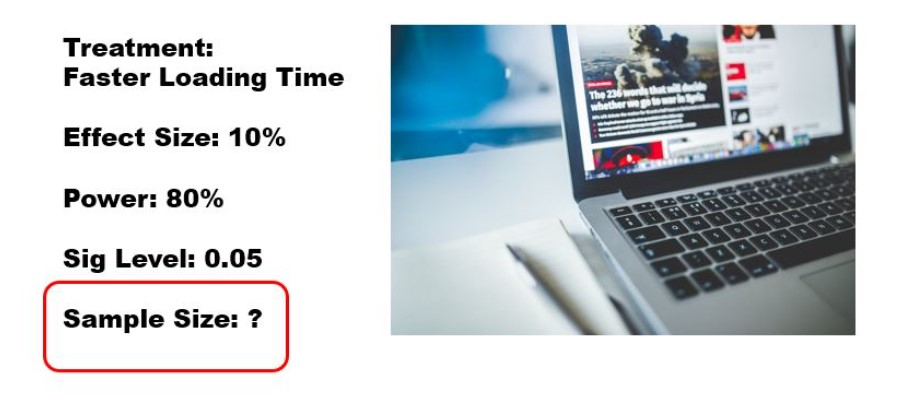

In [12]:
## Hình minh họa Image(fig1, height, width)

#### Simulation for power analysis
>- Suppose you find that the time users spend on your website is normally distributed and you simulate time spent by control users. You can then simulate time spent by treatment users by increasing the mean by the effect size, say 10%. 
>- The number of samples in both cases is initially fixed at a small number, say 50. 
>- Now just run a t-test or a permutation test from our earlier lesson, and get a p-value.
>- Repeat this process a number of times and calculate the fraction of times this p-value was less than 0.05. This is your power. If power is less than 80%, increase the sample size and rerun the process. 
>- If it is greater than or equal to 80%, stop. You've found a sample size that gives you 80% power to detect a 10% change at a significance level of 0.05.

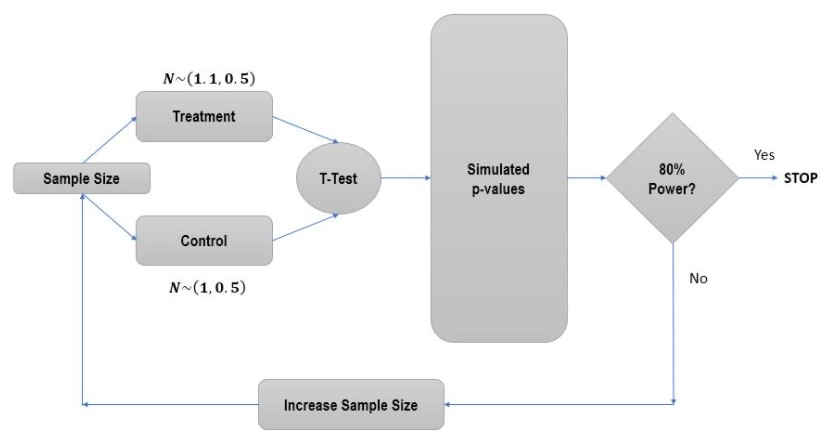

In [13]:
## Hình minh họa Image(fig1, height, width)

### 3.2. PRACTICES.
#### Exercise 3.2.1. Factors influencing Statistical Power
In this exercise, you will refresh some basic concepts to test your understanding of statistical power. It is very important to understand statistical power, especially if you are designing an A/B test.

Consider the following four options and select the factor that **does not influence** the `statistical power` of an experiment:
>- A. Magnitude of the effect / Effect size
>- B. Sample Size
>- C. Statistical Significance Level ($\alpha$)
>- D. Number of Simulations

#### Answer & Explaination.
>- A. Wrong. The `magnitude` of the effect does indeed impact the statistical power of an experiment.
>- B. Incorrect! The `larger the sample size`, the `more power` you can expect from the experiment.
>- C. Incorrect. Going to a `more stringent level` of significance would mean you require a `larger sample` to achieve the `same statistical power`.
>- **D. Correct!!**

#### Exercise 3.2.2. Power Analysis - Part I
Now we turn to power analysis. You typically want to ensure that any experiment or `A/B test` you run has `at least 80% power`. One way to ensure this is to calculate the sample size required to achieve `80% power`.

>- Suppose that you are in charge of a news media website and you are interested in increasing the amount of time users spend on your website. 
>- Currently, the time users spend on your website is normally distributed with a mean of 1 minute and a standard deviation of 0.5 minutes. 
>- Suppose that you are introducing a feature that loads pages faster and want to know the sample size required to measure a 5% increase in time spent on the website.

In this exercise, we will set up the framework to run one simulation, run a t-test, & calculate the p-value.

In [14]:
# Import scipy.stats alias st
import scipy.stats as st

# Initialize effect_size, control_mean, control_sd
effect_size, sample_size, control_mean, control_sd = 0.05, 50, 1, 0.5

# Simulate control_time_spent and treatment_time_spent, assuming equal variance
control_time_spent = np.random.normal(loc=control_mean, scale=control_sd, size=sample_size)
treatment_time_spent = np.random.normal(loc=control_mean*(1+effect_size), scale=control_sd, size=sample_size)

# Run the t-test and get the p_value
t_stat, p_value = st.ttest_ind(control_time_spent, treatment_time_spent)
stat_sig = p_value < effect_size
print("P-value: {}, Statistically Significant? {}".format(p_value, stat_sig))

P-value: 0.35675501110230257, Statistically Significant? False


#### Exercise 3.2.3. Power Analysis - Part II
Previously, we simulated one instance of the experiment & generated a `p-value`. 

We will now use this framework to `calculate statistical power`. `Power of an experiment` is the experiment's ability to detect a difference between treatment & control if the difference really exists. It's good statistical hygiene to strive for `80% power`.
>- For our website, suppose we want to know how many people need to visit each variant, such that we can detect a `10%` increase in time spent with `80% power`. 
>- For this, we start with a `small sample (50)`, simulate multiple instances of this experiment & check power. 
>- If `80% power` is reached, we stop. 
>- If not, we increase the sample size & try again.
#### SOLUTION.

In [15]:
sample_size, sims = 50, 2000

# Keep incrementing sample size by 10 till we reach required power
while 1:
    # For the time_spent random variables, set size as tuples such that shape is sample_size  sims
    control_time_spent = np.random.normal(loc=control_mean, scale=control_sd, size=(sample_size, sims))
    treatment_time_spent = np.random.normal(loc=control_mean*(1+effect_size), scale=control_sd, size=(sample_size, sims))
    t, p = st.ttest_ind(treatment_time_spent, control_time_spent)
    
    # Power is the fraction of times in the simulation when the p-value was less than 0.05
    power = (p < 0.05).sum()/sims
    if power >= 0.8: 
        break
    else: 
        sample_size += 10
print("For 80% power, sample size required = {}".format(sample_size))

For 80% power, sample size required = 1540


## 4. Applications in Finance
Simulations are highly popular in the field of finance. 
>- Models are built for a wide variety of purposes and in some cases, the builders of these models have gained huge fame, even going on to win the `Nobel prize`.
>- While the field of finance has a rich history of using simulation to understand `market dynamics`, in this lesson, we will only scratch the surface.
### 4.1. Theory.
#### Applications in Finance
Simulation is used in a number of areas within finance. Here are some broad categories. 
>- Simulation is quite heavily used in **`pricing options`** and other **`financial instruments`**. 
>- In the corporate world, simulation is used for **`project finance`**. We've seen examples of this in earlier chapters, it's very similar to the application of simulation in business decision-making. 
>- Finally, simulation is used in **`evaluating portfolios`**. Typically portfolio managers want to *`understand the consequences of having different asset mixes in their portfolio so that they can quantify the risk involved in the decision`*.

#### Portfolio Simulation
At it's very core, the idea of using simulation for portfolio evaluation is very simple. 

>- You build a data generating model to `capture uncertainty`. 
>- Then you vary the inputs to the model and simulate multiple outcomes. 
>- Finally, you analyze the outcomes to make your decision. In this case, you are analyzing a portfolio with a principal or initial investment of `$10,000`. 

You are interested in understanding the returns of your portfolio after 10 years. Given your current mix of assets, your portfolio is `stock heavy`. 

A `stock-heavy portfolio` has a high expected rate of return, but also has `high volatility`. 

Stock heavy portfolios are usually risky, but good for people who are investing for the `longer term`.

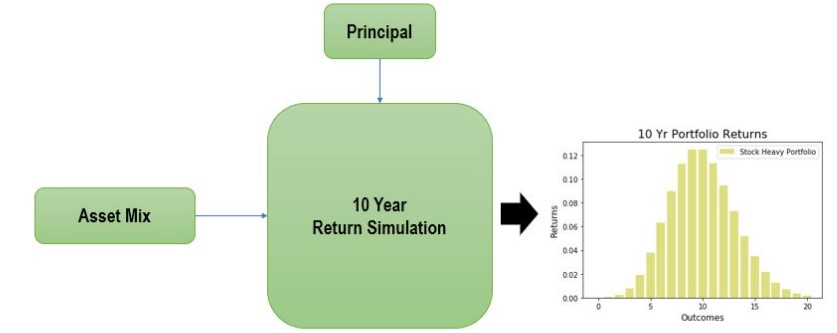

In [16]:
## Hình minh họa Image(fig1, height, width)

In addition to the stock heavy portfolio, you also have the option of rebalancing your portfolio to add more bonds. 
>- A bond heavy portfolio has a lower expected rate of return, but also lower volatility, implying more assured returns. 
>- Such a portfolio is typically good for people close to retirement. 
>- *`To compare these two strategies`*, all you need to do is simulate multiple outcomes from each scenario and analyze the returns. 
>- If you are conservative in your approach, you might **look at** the `lower percentile` of the distribution of returns in each case to see how much return you are assured of with a `high probability`.

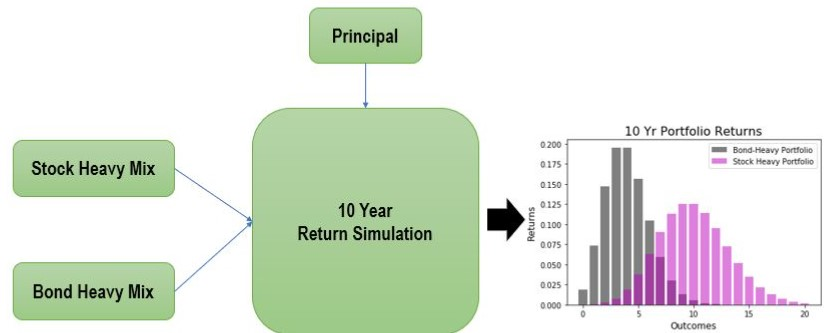

In [17]:
## Hình minh họa Image(fig1, height, width)

### 4.2. PRACTICES.
#### Exercise 4.2.1. Portfolio Simulation - Part I
In the next few exercises, you will calculate the expected returns of a `stock portfolio` & characterize its uncertainty.

>- Suppose you have invested `$10,000` in your portfolio comprising of multiple stocks. You want to evaluate the portfolio's performance over 10 years. 
>- You can tweak your overall expected rate of return and volatility (standard deviation of the rate of return).
>- Assume the rate of return follows a `normal distribution`.
>- First, let's write a function that takes the principal (initial investment), number of years, expected rate of return and volatility as inputs and returns the portfolio's total value after 10 years.

Upon completion of this exercise, you will have a function you can call to determine portfolio performance.

#### SOLUTION.

In [18]:
# rates is a Normal random variable and has size equal to number of years
def portfolio_return(yrs, avg_return, sd_of_return, principal):
    """
        yrs: number of years
        avg_return: the expected rate of return
        sd_of_return: volatility
        principal: initial investment
    """

    # Simulate rates of return for each year as a normal random variable.
    np.random.seed(123)
    rates = np.random.normal(loc=avg_return, scale=sd_of_return, size=yrs)
    
    # Calculate the return at the end of the period
    end_return = principal  # Initialize end_return to the principal input.
    for x in rates:
        end_return = end_return*(1 + x) # end_return is scaled up by the rate each year.
    return end_return

result = portfolio_return(yrs = 5, avg_return = 0.07, sd_of_return = 0.15, principal = 1000)
print("Portfolio return after 5 years = {}".format(result))

Portfolio return after 5 years = 1021.4013412039292


#### Exercise 4.2.2. Portfolio Simulation - Part II
Now we will use the simulation function you built to evaluate `10-year returns`.

>- Your stock-heavy portfolio has an initial investment of `$10,000`, an expected return of `7%` and a volatility of `30%`. 
>- You want to get a `95%` confidence interval of what your investment will be worth in `10 years`. 
>- We will simulate multiple samples of `10-year returns` and calculate the `confidence intervals` on the distribution of `returns`.

By the end of this exercise, you will have run a complete portfolio simulation.

The function `portfolio_return()` from the previous exercise is already initialized in the environment.

#### SOLUTION.

In [19]:
# Run 1,000 iterations and store the results
sims, rets, volatility = 1000, [], 0.3

# Enter the appropriate values for the portfolio_return() function parameters.
for i in range(sims):
    rets.append(portfolio_return(yrs = 10, avg_return = 0.07, 
                                 sd_of_return = volatility, principal = 10000))

# Calculate the 95% CI
lower_ci = np.percentile(rets, 2.5) ## lower-tail of two-side: alpha / 2 = 2.5 %
upper_ci = np.percentile(rets, 97.5) ## upper-tail: 1 - (alpha / 2) = 97.5 %
print("95% CI of Returns: Lower = {}, Upper = {}".format(lower_ci, upper_ci))

95% CI of Returns: Lower = 3859.345207073691, Upper = 3859.345207073691


#### Exercise 4.2.3. Portfolio Simulation - Part III
Previously, we ran a complete simulation to get a distribution for `10-year returns`. 

Now we will use simulation for `decision making`.
>- Let's go back to your stock-heavy portfolio with an `expected return` of `7%` and a `volatility` of `30%`.
>- You have the `choice of rebalancing` your portfolio with some bonds such that the expected return is `4%` & `volatility is 10%`. 
>- You have a `principal of $10,000`. 

You want to select a strategy **based on how much your portfolio will be worth in 10 years**. 

Let's simulate returns for both the portfolios and choose based on the least amount you can expect with `75% probability (25th percentile)`.

Upon completion, you will know how to use a portfolio simulation for `investment decisions`.

The `portfolio_return()` function is again pre-loaded in the environment.

#### SOLUTION.

In [20]:
# Initialize rets_stock and rets_bond
rets_stock, rets_bond = [], []

# Set avg_return and volatility parameters for stock-portfolio and bond-portfolio.
for i in range(sims):
    rets_stock.append(portfolio_return(yrs = 10, avg_return = 0.07, 
                                       sd_of_return = 0.3, ## volatility is equiv to sd_return here
                                       principal = 10000))
    rets_bond.append(portfolio_return(yrs = 10, avg_return = 0.04, 
                                      sd_of_return = 0.1, 
                                      principal = 10000))

# Calculate the 25th percentile of the distributions and the amount you'd lose or gain
rets_stock_perc = np.percentile(rets_stock, 25)
rets_bond_perc = np.percentile(rets_bond, 25)

# Calculate additional_returns by subtract rets_bond_perc from rets_stock_perc.
additional_returns = - rets_bond_perc + rets_stock_perc
print("Sticking to stocks gets you an additional return of {}".format(additional_returns))

Sticking to stocks gets you an additional return of -6696.359667655672
